In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import models, layers
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_palette('coolwarm')

# Loading Dataset
This dataset contains information on energy consumption and various weather parameters such as solar radiation, temperature, pressure, humidity, wind speed, and precipitation. The "Energy delta[Wh]" column represents the change in energy consumption over a certain time period, while the "GHI" column measures the Global Horizontal Irradiance, which is the amount of solar radiation received by a horizontal surface. The dataset also includes information on the presence of sunlight ("isSun"), the length of daylight ("dayLength"), and the amount of time during which sunlight is available ("sunlightTime"). The "weather_type" column provides information on the overall weather conditions such as clear, cloudy, or rainy. The dataset is organized by hour and month, making it ideal for studying the relationship between renewable energy generation and weather patterns over time.

In [6]:
data = pd.read_csv("solar_weather.csv")

In [7]:
data.head(2)

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1


In [8]:
data.describe()

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
count,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000
mean,573.008228,32.596538,9.790521,1015.292780,79.810566,3.937746,0.066035,0.007148,65.974387,0.519962,211.721094,748.644347,0.265187,3.198398,11.498902,6.298329
std,1044.824047,52.172018,7.995428,9.585773,15.604459,1.821694,0.278913,0.069710,36.628593,0.499603,273.902186,194.870208,0.329023,1.289939,6.921887,3.376066
min,0.000000,0.000000,-16.600000,977.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,450.000000,0.000000,1.000000,0.000000,1.000000
25%,0.000000,0.000000,3.600000,1010.000000,70.000000,2.600000,0.000000,0.000000,34.000000,0.000000,0.000000,570.000000,0.000000,2.000000,5.000000,3.000000
50%,0.000000,1.600000,9.300000,1016.000000,84.000000,3.700000,0.000000,0.000000,82.000000,1.000000,30.000000,765.000000,0.050000,4.000000,11.000000,6.000000
75%,577.000000,46.800000,15.700000,1021.000000,92.000000,5.000000,0.000000,0.000000,100.000000,1.000000,390.000000,930.000000,0.530000,4.000000,17.000000,9.000000
max,5020.000000,229.200000,35.800000,1047.000000,100.000000,14.300000,8.090000,2.820000,100.000000,1.000000,1020.000000,1020.000000,1.000000,5.000000,23.000000,12.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196776 entries, 0 to 196775
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Time                    196776 non-null  object 
 1   Energy delta[Wh]        196776 non-null  int64  
 2   GHI                     196776 non-null  float64
 3   temp                    196776 non-null  float64
 4   pressure                196776 non-null  int64  
 5   humidity                196776 non-null  int64  
 6   wind_speed              196776 non-null  float64
 7   rain_1h                 196776 non-null  float64
 8   snow_1h                 196776 non-null  float64
 9   clouds_all              196776 non-null  int64  
 10  isSun                   196776 non-null  int64  
 11  sunlightTime            196776 non-null  int64  
 12  dayLength               196776 non-null  int64  
 13  SunlightTime/daylength  196776 non-null  float64
 14  weather_type        

The dataset has 17 columns with 196776 data points. 
Out of theses 16 columns 1 column is 'Object' type (categorical), 
6 columns are of 'Float64' type and 
rest 10 columns are of 'Int64' type.

# Missing Values¶

In [11]:
data.isnull().sum()
# SO no missing value

Time                      0
Energy delta[Wh]          0
GHI                       0
temp                      0
pressure                  0
humidity                  0
wind_speed                0
rain_1h                   0
snow_1h                   0
clouds_all                0
isSun                     0
sunlightTime              0
dayLength                 0
SunlightTime/daylength    0
weather_type              0
hour                      0
month                     0
dtype: int64

# Data Manupulation & Feature Engineering

In [29]:
data_copy1 = data.copy()

### convert time to date time object

In [30]:
data_copy1['Time'] = pd.to_datetime(data_copy1['Time'])

In [31]:
data_copy1['hour_precise'] = data_copy1['Time'].apply(lambda x: x.time())

In [32]:
data_copy1['date'] = data_copy1['Time'].apply(lambda x: x.date())

In [33]:
data_copy1.head(5)

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month,hour_precise,date
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1,00:00:00,2017-01-01
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1,00:15:00,2017-01-01
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1,00:30:00,2017-01-01
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1,00:45:00,2017-01-01
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1,01:00:00,2017-01-01


In [34]:
data_copy2 = data_copy1.copy()

## monthwise data 

In [35]:
data_copy2['month_string'] = data_copy2['month'].replace({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'})
data_copy2.head()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month,hour_precise,date,month_string
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1,00:00:00,2017-01-01,January
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1,00:15:00,2017-01-01,January
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1,00:30:00,2017-01-01,January
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1,00:45:00,2017-01-01,January
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1,01:00:00,2017-01-01,January


# Data Interpretation

Text(0, 0.5, 'Energy')

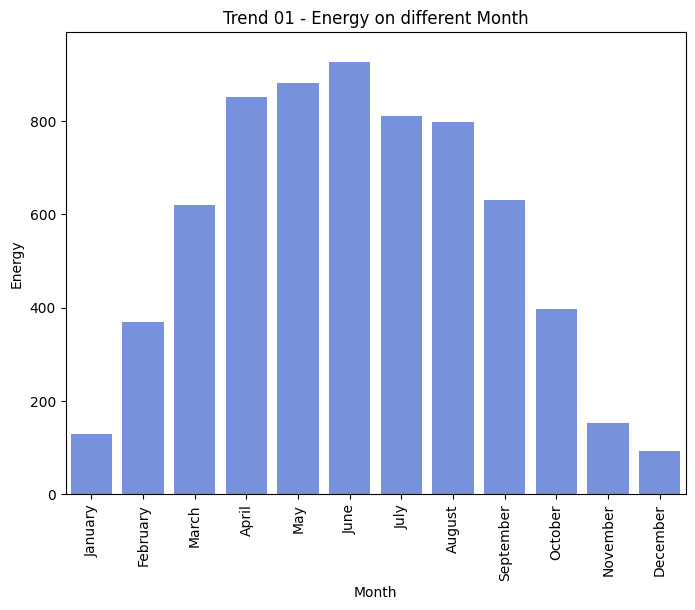

In [40]:
plt.figure(figsize=(8,6))
sns.barplot(x=data_copy2['month_string'], y=data_copy2['Energy delta[Wh]'], errwidth=0)
plt.title('Trend 01 - Energy on different Month')
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.ylabel('Energy')

Text(0, 0.5, 'Solar Radiation')

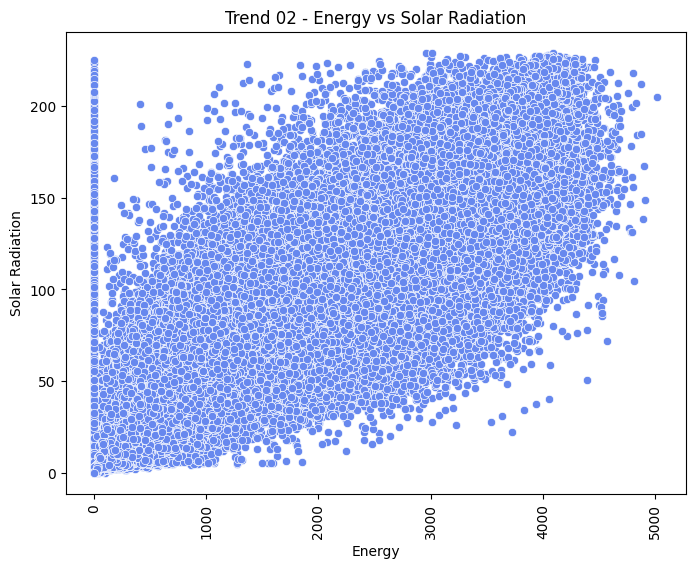

In [41]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=data['Energy delta[Wh]'], y=data['GHI'])
plt.title('Trend 02 - Energy vs Solar Radiation')
plt.xlabel('Energy')
plt.xticks(rotation=90)
plt.ylabel('Solar Radiation')

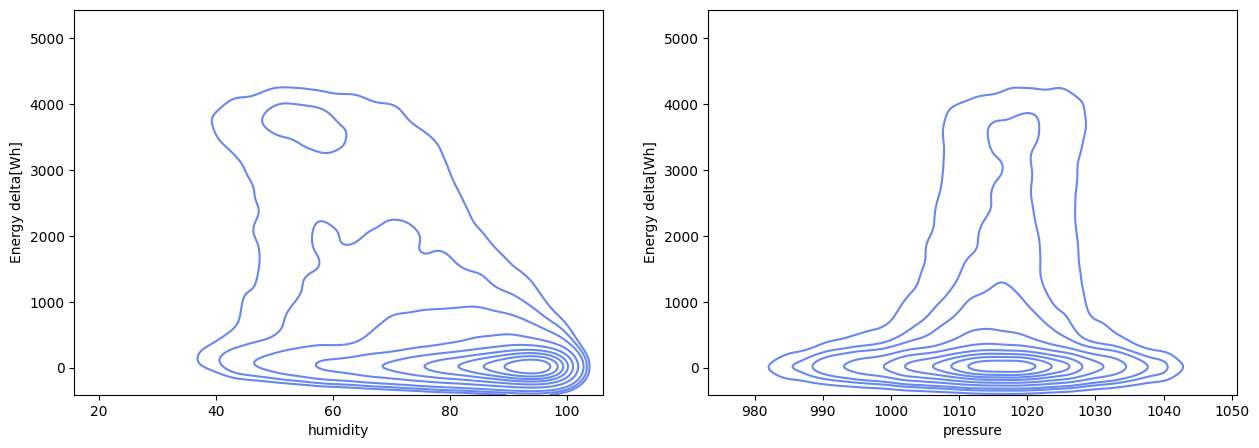

In [43]:
figure, ax = plt.subplots(1,2,figsize=(15,5))
sns.kdeplot(data_copy2, x='humidity', y='Energy delta[Wh]',ax=ax[0])
sns.kdeplot(data_copy2, x='pressure', y='Energy delta[Wh]',ax=ax[1])


plt.show()

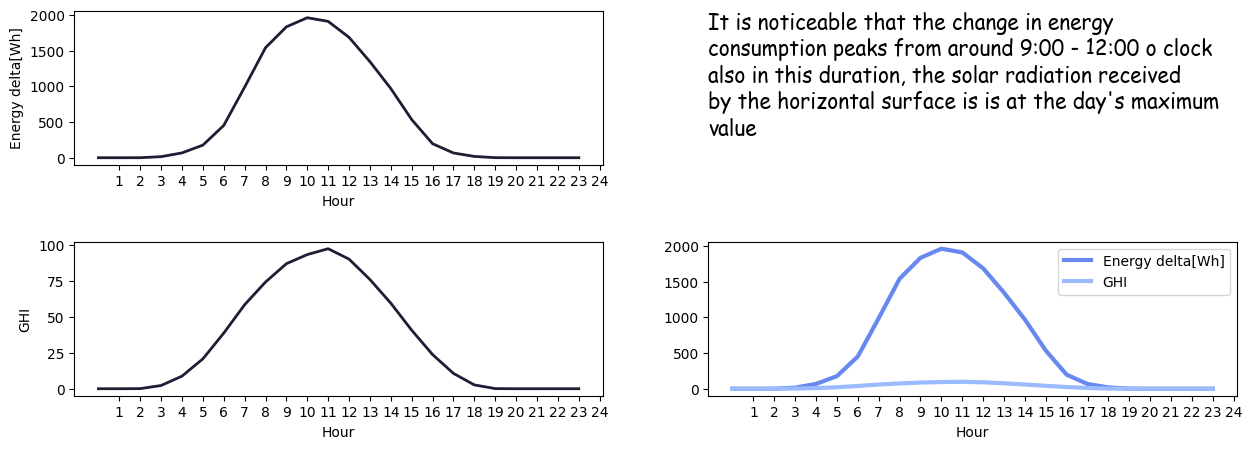

In [46]:
hourly_consumption = pd.DataFrame(data_copy2.groupby('hour')[['Energy delta[Wh]','GHI']].mean())

figure, ax  = plt.subplots(2,2,figsize = (15,5))
plt.subplots_adjust(hspace=0.5)

ax[0,0].plot(hourly_consumption.index,hourly_consumption['Energy delta[Wh]'],color='#1C1F33',linewidth=2)
ax[0,0].set_xticks(np.arange(1,25,1))
ax[0,0].set_xlabel('Hour')
ax[0,0].set_ylabel('Energy delta[Wh]')

text = 'It is noticeable that the change in energy\nconsumption peaks from around 9:00 - 12:00 o clock\n\
also in this duration, the solar radiation received\nby the horizontal surface is is at the day\'s maximum\nvalue'
ax[0,1].text(0,0.2,text,fontsize=15,color='black',fontweight=500,fontfamily='cursive')
ax[0,1].axis('off')

ax[1,0].plot(hourly_consumption.index,hourly_consumption['GHI'],color='#1C1F33',linewidth=2)
ax[1,0].set_xticks(np.arange(1,25,1))
ax[1,0].set_xlabel('Hour')
ax[1,0].set_ylabel('GHI')

ax[1,1].plot(hourly_consumption,linewidth=3)
ax[1,1].set_xticks(np.arange(1,25,1))
ax[1,1].set_xlabel('Hour')
ax[1,1].legend(['Energy delta[Wh]','GHI'])
plt.show()

# Modelling

Change dataframe index to datetime and converting time data to time signal

In [47]:
df = data.copy()

In [48]:
df.index = pd.to_datetime(df['Time'], format='%Y-%m-%d %H:%M:%S')
df = df.drop('Time', axis='columns')
df['timestamp'] = df.index.map(pd.Timestamp.timestamp)
df.head()

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month,timestamp
Time,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1,1.483229e+09
2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1,1.483230e+09
2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1,1.483231e+09
2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1,1.483232e+09
2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1,1.483232e+09


In [49]:
day = 60 * 60 * 24
year = 365.2425 * day

In [50]:
df['day sin'] = np.sin(df['timestamp'] * (2 * np.pi/day))
df['day cos'] = np.cos(df['timestamp'] * (2 * np.pi/day))
df['year sin'] = np.sin(df['timestamp'] * (2 * np.pi/year))
df['year cos'] = np.cos(df['timestamp'] * (2 * np.pi/year))
df.head()

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,...,dayLength,SunlightTime/daylength,weather_type,hour,month,timestamp,day sin,day cos,year sin,year cos
Time,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,...,450,0.0,4,0,1,1.483229e+09,2.504006e-13,1.000000,0.010364,0.999946
2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,...,450,0.0,4,0,1,1.483230e+09,6.540313e-02,0.997859,0.010544,0.999944
2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,...,450,0.0,4,0,1,1.483231e+09,1.305262e-01,0.991445,0.010723,0.999943
2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,...,450,0.0,4,0,1,1.483232e+09,1.950903e-01,0.980785,0.010902,0.999941
2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,...,450,0.0,4,1,1,1.483232e+09,2.588190e-01,0.965926,0.011081,0.999939


In [51]:
df = df.drop(['timestamp', 'hour', 'month'], axis='columns')
df.head()

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,day sin,day cos,year sin,year cos
Time,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,2.504006e-13,1.000000,0.010364,0.999946
2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,6.540313e-02,0.997859,0.010544,0.999944
2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,1.305262e-01,0.991445,0.010723,0.999943
2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,1.950903e-01,0.980785,0.010902,0.999941
2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,2.588190e-01,0.965926,0.011081,0.999939


# Preparing data for Deep Learning

In [52]:
train_count = round(0.85 * len(df))
val_count = round(0.9 * len(df))

In [53]:
df_train = df[:train_count]
df_val = df[train_count:val_count]
df_test = df[val_count:]

In [56]:
scaler = MinMaxScaler()

In [57]:
WINDOW_SIZE = 20

In [60]:
def df_to_data1(df, window_size=5):
    data = scaler.fit_transform(df.drop('Energy delta[Wh]', axis='columns').to_numpy())
    labels = df['Energy delta[Wh]'].to_numpy()
    
    X = []
    y = []
    
    for i in range(len(data) - window_size):
        row = data[i:i + window_size]
        X.append(row)
        y.append(labels[i + window_size])
        
    return np.array(X), np.array(y)

In [61]:
def df_to_data2(df, window_size=5):
    data = scaler.transform(df.drop('Energy delta[Wh]', axis='columns').to_numpy())
    labels = df['Energy delta[Wh]'].to_numpy()
    
    X = []
    y = []
    
    for i in range(len(data) - window_size):
        row = data[i:i + window_size]
        X.append(row)
        y.append(labels[i + window_size])
        
    return np.array(X), np.array(y)

In [62]:
X_train, y_train = df_to_data1(df_train, window_size=WINDOW_SIZE)
X_val, y_val = df_to_data2(df_val, window_size=WINDOW_SIZE)
X_test, y_test = df_to_data2(df_test, window_size=WINDOW_SIZE)

# Generating and fitting model

In [64]:
model = models.Sequential([
    layers.LSTM(64, input_shape=(WINDOW_SIZE, X_train.shape[2])),
    layers.Dense(128, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(1, activation='linear')
])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                20992     
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 512)               131584    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 194433 (759.50 KB)
Trainable params: 1944

In [65]:
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

In [66]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

Epoch 1/10


5227/5227 [==============================] - 55s 10ms/step - loss: 143464.2500 - mse: 143464.2500 - mae: 168.0108 - val_loss: 47604.7266 - val_mse: 47604.7266 - val_mae: 66.9969
Epoch 2/10
5227/5227 [==============================] - 51s 10ms/step - loss: 100062.3672 - mse: 100062.3672 - mae: 136.9691 - val_loss: 48853.4297 - val_mse: 48853.4297 - val_mae: 67.8076
Epoch 3/10
5227/5227 [==============================] - 50s 9ms/step - loss: 97058.2734 - mse: 97058.2734 - mae: 133.7973 - val_loss: 46770.4258 - val_mse: 46770.4258 - val_mae: 67.4045
Epoch 4/10
5227/5227 [==============================] - 53s 10ms/step - loss: 95235.1016 - mse: 95235.1016 - mae: 131.4524 - val_loss: 47019.8164 - val_mse: 47019.8164 - val_mae: 68.2987
Epoch 5/10
5227/5227 [==============================] - 60s 11ms/step - loss: 93619.4219 - mse: 93619.4219 - mae: 129.9433 - val_loss: 49182.9141 - val_mse: 49182.9141 - val_mae: 71.7393
Epoch 6/10
5227/5227 [==============================] - 50s 

# model performance with test data

In [70]:
X_test, y_test = df_to_data2(df_test, window_size=WINDOW_SIZE)

In [75]:
def plotPredictions(X, y, start=0, end=200):
    predictions = model.predict(X)
    predictions = np.hstack(predictions)
    plt.plot(y[start:end], label='Actual',color="red")
    plt.plot(predictions[start:end], label='Predicted')
    plt.legend()
    print(f'MSE {mean_squared_error(y, predictions):.2f}')
    print(f'MAE {mean_absolute_error(y, predictions):.2f}')
    spearman_stats = spearmanr(y, predictions)
    print(spearman_stats)

615/615 [==============================] - 2s 4ms/step
MSE 155235.04
MAE 160.04
SignificanceResult(statistic=0.9350741559138344, pvalue=0.0)


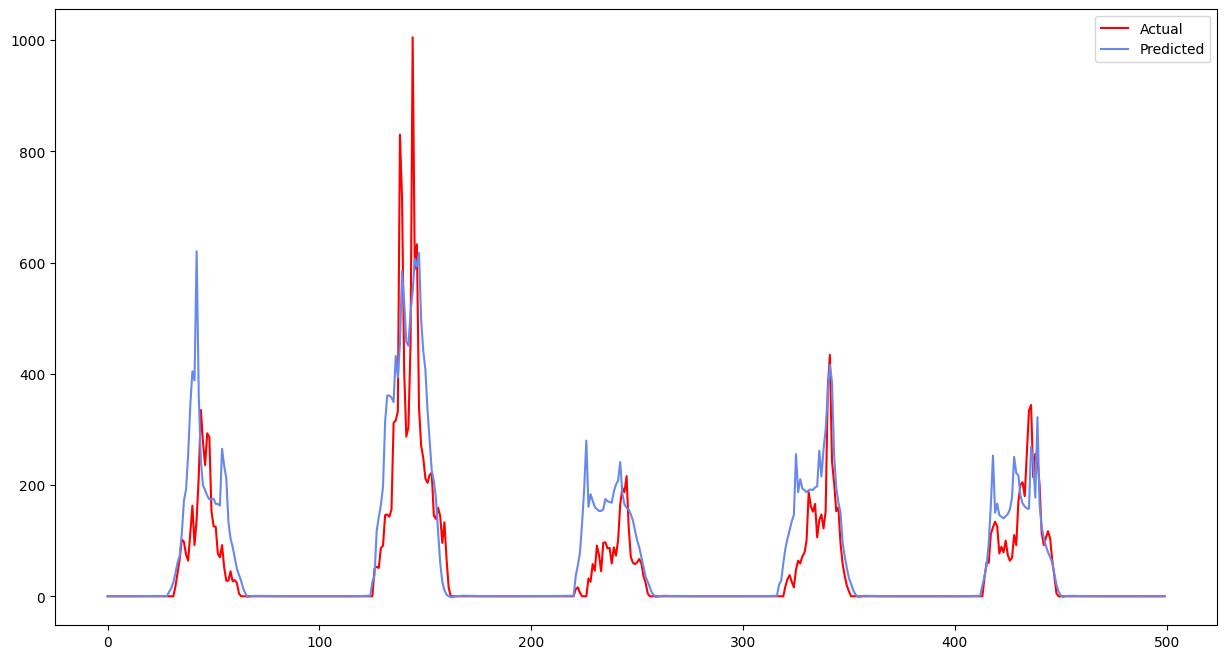

In [76]:
plt.figure(figsize=(15,8))
sns.set_palette('coolwarm')
plotPredictions(X_test, y_test, start=0, end=500)